# Covid-19 Analysis

In [1]:
import numpy as np

import pandas as pd #The pandas library
from pandas import Series, DataFrame #Main pandas data structures

import os

import pandas_datareader.data as web # For accessing web data
from datetime import datetime #For handling dates

import scipy as sp #library for scientific computations 
from scipy import stats #The statistics part of the library
from scipy.stats import ttest_ind,ttest_rel

import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl

import seaborn as sns #A more fancy plotting library
from tabulate import tabulate

#For presenting plots inline
%matplotlib inline 

In [2]:
df = pd.read_csv("owid-covid-data.csv")

## For date 1/11/2020, and indexes Total Cases per Million, Total Deaths per Million and Mortality Rate, find the collelation with the characteristics such as GDP per Capita, Hospital Beds per Thousand and Population Density.

In [3]:
#Analysis is for Date: '1/11/2020'
dfA = df.copy()
dfA = dfA.loc[df['date'] == '2020-11-01']

In [4]:
# calculate martality rate = total_deaths_per_million / total_cases_per_million
dfA["mortality_rate"]=(dfA["total_deaths_per_million"]) / (dfA["total_cases_per_million"])

In [5]:
dfA

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,mortality_rate
306,AFG,Asia,Afghanistan,2020-11-01,41501.0,76.0,104.714,1536.0,0.0,3.571,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,0.037011
567,ALB,Europe,Albania,2020-11-01,20875.0,241.0,288.143,509.0,7.0,5.143,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,0.024383
897,DZA,Africa,Algeria,2020-11-01,57942.0,291.0,294.571,1964.0,8.0,8.143,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,0.033896
1159,AND,Europe,Andorra,2020-11-01,4756.0,91.0,102.571,75.0,0.0,0.857,...,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,0.015770
1407,AGO,Africa,Angola,2020-11-01,10558.0,289.0,247.000,279.0,4.0,2.000,...,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,0.026426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57728,YEM,Asia,Yemen,2020-11-01,2063.0,0.0,0.000,600.0,0.0,0.143,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,0.290843
57979,ZMB,Africa,Zambia,2020-11-01,16432.0,17.0,45.000,349.0,0.0,0.143,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,0.021239
58228,ZWE,Africa,Zimbabwe,2020-11-01,8362.0,0.0,13.286,242.0,0.0,0.857,...,21.4,307.846,1.82,1.600,30.700,36.791,1.700,61.49,0.535,0.028940
58558,OWID_WRL,NaN,World,2020-11-01,46181592.0,459027.0,484913.429,1196568.0,6419.0,6476.714,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,0.025910


In [6]:
# calculating log for population density afterwards
dfA["log_population_density"] = dfA["population_density"]
dfA["log_population_density"] = np.log10(dfA["log_population_density"])
dfA[["population_density","log_population_density"]]

,population_density,log_population_density
306,54.422,1.735774
567,104.871,2.020655
897,17.348,1.239249
1159,163.755,2.214195
1407,23.890,1.378216
...,...,...
57728,53.508,1.728419
57979,22.995,1.361633
58228,42.729,1.630723
58558,58.045,1.763765


## Scatter Plots for all countries

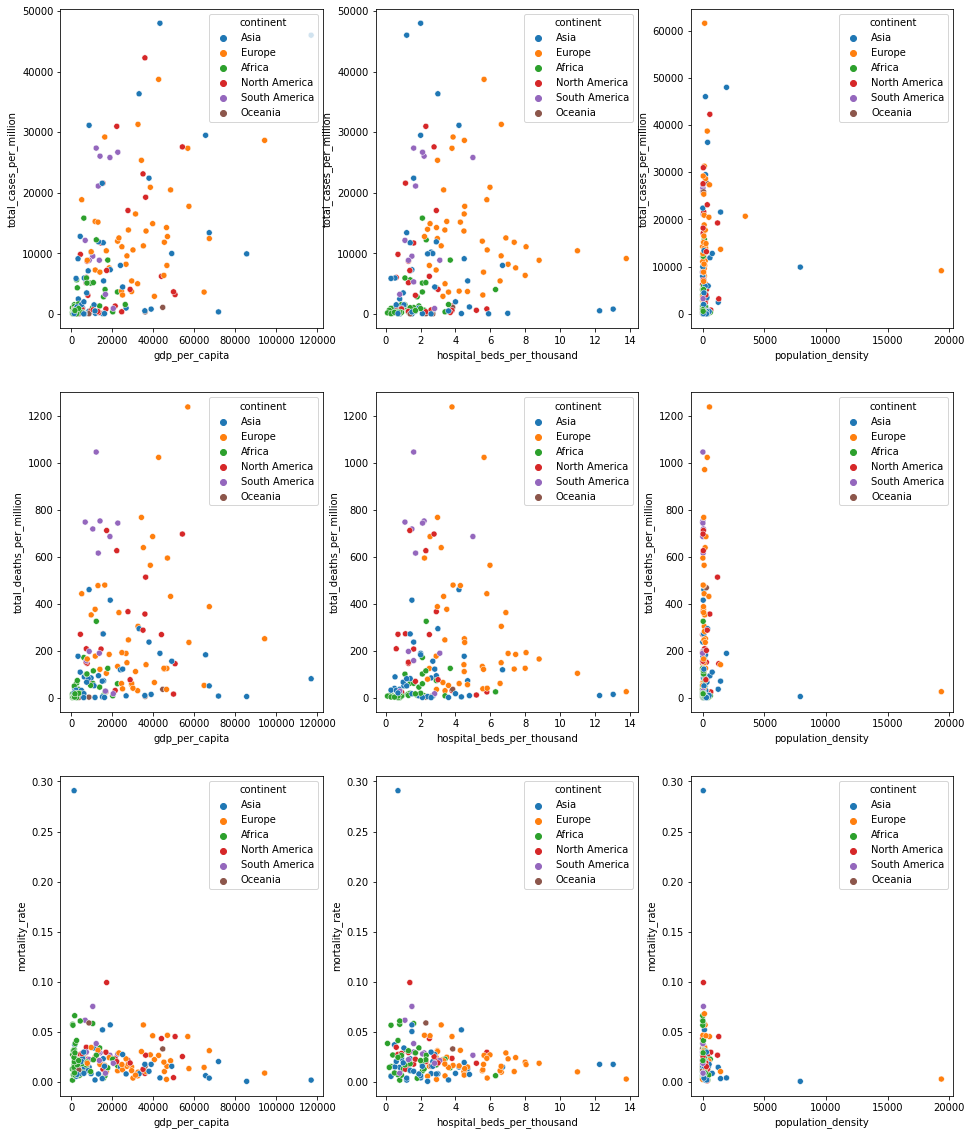

In [7]:
# Making a scatter plot for each pair (index,feature)
# default pop_density="population_density" else
# pop_density="log_population_density"

def my_plot(dataplot,pop_density="population_density"):
    fig, ax = plt.subplots(3,3, figsize=(16,20))
    sns.scatterplot(x="gdp_per_capita", y="total_cases_per_million",hue="continent", data=dataplot, ax=ax[0,0])
    sns.scatterplot(x="hospital_beds_per_thousand", y="total_cases_per_million", hue="continent",data=dataplot, ax=ax[0,1])
    sns.scatterplot(x=pop_density,y="total_cases_per_million",data=dataplot,hue="continent", ax=ax[0,2])
    sns.scatterplot(x="gdp_per_capita",y="total_deaths_per_million",data=dataplot,hue="continent", ax=ax[1,0])
    sns.scatterplot(x="hospital_beds_per_thousand",y="total_deaths_per_million",data=dataplot,hue="continent", ax=ax[1,1])
    sns.scatterplot(x=pop_density,y="total_deaths_per_million",data=dataplot,hue="continent", ax=ax[1,2])
    sns.scatterplot(x="gdp_per_capita",y="mortality_rate",data=dataplot,hue="continent", ax=ax[2,0])
    sns.scatterplot(x="hospital_beds_per_thousand",y="mortality_rate",data=dataplot,hue="continent", ax=ax[2,1])
    sns.scatterplot(x=pop_density,y="mortality_rate",data=dataplot,hue="continent",ax=ax[2,2])

my_plot(dfA)

As we know Population density is often used as a simple relative measure of how an organism responds to local conditions. If conditions are not good for the species, the density will be low, whereas if conditions are good the density will be high. The x-axis for population density it is measured by step 2500people/km2.

So we can tell for the Date '2020-11-01', that population density is very very low as total cases per million, total deaths per million and mortality rate are increasing. It is happening because that date we were at lockdown. 

## Pearson Correlation Coefficient for all countries


In [8]:
# Every time keep an array of the values for 
# 'total_cases_per_million','total_deaths_per_million','mortality_rate' and
# 'gdp_per_capita',''hospital_beds_per_thousand'',''population_density'' 
# and then create a DataFrame 

In [9]:
# for loop so we can calculate pearson correlation coefficient between each pair 
# indexer and feature
def calc_pearson_cc(data):
    # always keeping an array each time
    # to append the values
    # and we will create a DataFrame after
    array = []
    for i in range(3):
        x = data.columns[i]
        for j in range(3,6):
            y = data.columns[j]
            d = data[[x,y]]
            cor,pval = stats.pearsonr(d[x],d[y])
            if pval<0.05:
                array.append([x,y,cor,pval,"Yes"])
            else:
                array.append([x,y,cor,pval,"No"])
            print("\n")
            
        
    # return numpy array to create after the Dataframe
    return array


# pearson correlation coefficient 
all_countries = dfA.copy()
all_countries = all_countries[["total_cases_per_million","total_deaths_per_million","mortality_rate",
                "gdp_per_capita","hospital_beds_per_thousand","population_density"]]

#pearsoncc.corr(method="pearson")
all_countries = calc_pearson_cc(all_countries.dropna(axis=0,how="any"))

## DataFrame for all countries

In [10]:
# creating a DataFrame with pearson correlation coefficient and pvalue for all countries
all_countries = pd.DataFrame(data=all_countries,
                columns=["Indexer","Characteristic",
                "Pearson_Correlation_Coefficient","Pvalue","Statistically_Significant"])
all_countries

,Indexer,Characteristic,Pearson_Correlation_Coefficient,Pvalue,Statistically_Significant
0,total_cases_per_million,gdp_per_capita,0.498025,1.191160e-10,Yes
1,total_cases_per_million,hospital_beds_per_thousand,0.152234,6.473503e-02,No
2,total_cases_per_million,population_density,0.084523,3.070755e-01,No
3,total_deaths_per_million,gdp_per_capita,0.215931,8.393567e-03,Yes
4,total_deaths_per_million,hospital_beds_per_thousand,0.080061,3.334027e-01,No
5,total_deaths_per_million,population_density,-0.064597,4.353880e-01,No
6,mortality_rate,gdp_per_capita,-0.166755,4.279861e-02,Yes
7,mortality_rate,hospital_beds_per_thousand,-0.170787,3.795254e-02,Yes
8,mortality_rate,population_density,-0.111013,1.791962e-01,No


At one hand, we see that the Pearson Correlation Coefficient for population density and total cases per million is 0.084. So there is a weak positive upward linear relationship. The explanation is that while total cases are increasing, population density should not increase so rapidly because there will be a lockdown. At the other hand, pearson correlation coefficient is negative (weak downhill linear relationship) for population density and total deaths (-0.064) which means that as total deaths are increasing, population density is decreasing (ex deaths in a hospital) and as total deaths are decreasing, population density is increasing. Same with population density and mortality rate(-0.111).

In [11]:
all_countries.columns.unique()

Index(['Indexer', 'Characteristic', 'Pearson_Correlation_Coefficient',
       'Pvalue', 'Statistically_Significant'],
      dtype='object')

## Plot for log of population density for all countries

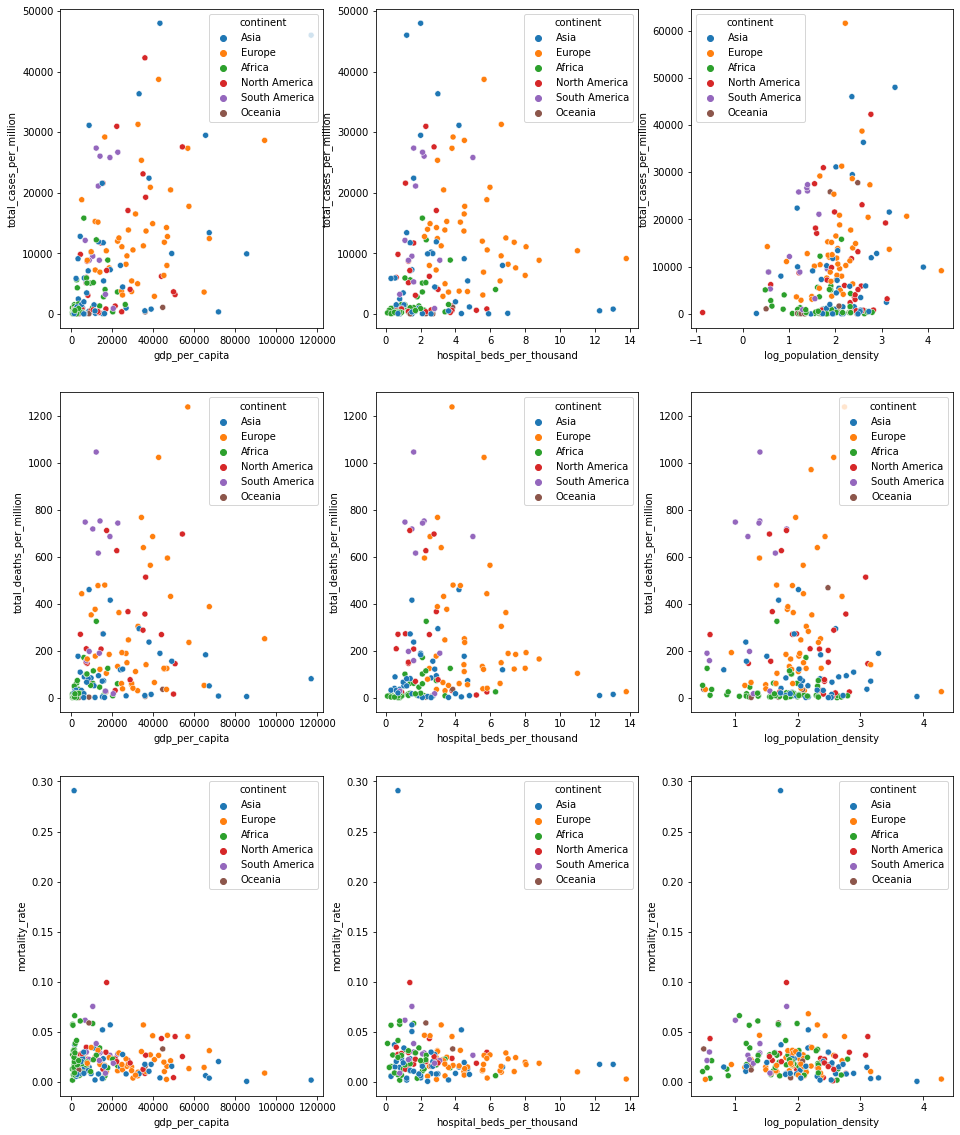

In [12]:
# log for population density
log_all_countries = dfA.copy()
my_plot(log_all_countries,"log_population_density")

For the log of population density (like we zoomed in) we see like some kind of clustering between total cases per million, total deaths per million and mortality rate. The x-axis for population density now it is measured by step 1 people/km2. The lockdows prohibitions took place, its is like max 4 people/km2 and everyone is staying inside. Mortality rate as well total cases and deaths are high enough.

## Pearson correlation coefficient for log of population density of all countries

In [13]:
# pearson correlation coefficient for log of population density
log_all_countries = log_all_countries[["total_cases_per_million","total_deaths_per_million","mortality_rate",
                "gdp_per_capita","hospital_beds_per_thousand","log_population_density"]]

log_all_countries = calc_pearson_cc(log_all_countries.dropna(axis=0,how="any"))

## DataFrame for all countries - log population density

In [14]:
# creating a DataFrame with pearson correlation coefficient and pvalue for all countries
log_all_countries = pd.DataFrame(data=log_all_countries,
                    columns=["Indexer","Characteristic",
                    "Pearson_Correlation_Coefficient","Pvalue","Statistically_Significant"])
log_all_countries

,Indexer,Characteristic,Pearson_Correlation_Coefficient,Pvalue,Statistically_Significant
0,total_cases_per_million,gdp_per_capita,0.498025,1.191160e-10,Yes
1,total_cases_per_million,hospital_beds_per_thousand,0.152234,6.473503e-02,No
2,total_cases_per_million,log_population_density,0.125082,1.298388e-01,No
3,total_deaths_per_million,gdp_per_capita,0.215931,8.393567e-03,Yes
4,total_deaths_per_million,hospital_beds_per_thousand,0.080061,3.334027e-01,No
5,total_deaths_per_million,log_population_density,-0.031277,7.059011e-01,No
6,mortality_rate,gdp_per_capita,-0.166755,4.279861e-02,Yes
7,mortality_rate,hospital_beds_per_thousand,-0.170787,3.795254e-02,Yes
8,mortality_rate,log_population_density,-0.107285,1.943347e-01,No


Now the Pearson Correlation Coefficient for log of population density and total cases is 0.125 which is greater than before(it was 0.084), for total deaths is -0.031 (before was -0.064) and for mortality rate is -0.107 (before was -0.111). Seems like is has increase in all 3 cases by +0.041 for total cases, +0.033 for total deaths and +0.004 for mortality rate.

##  Africa countries

For Africa Countries is it visible to say that at most plots there is a strong clustering a bottom left, like total cases per thousand plots where seems to have fewer total cases per million than other continents countries. Also for total deaths per million. The reason may be that Africa had strict lockdown prohibitions. Due to lockdown prohibitions, the population density is very low and mortality rate fluctuates till around 0.07. (ex if mortality rate = 0.05, there are 50 deaths per 1000 cases, not so good at all!) 
Africa has less GDP per capital than other continents countries and also hospital beds per thousand. South Africa had the most deaths, 327.29 deaths, than any other Africa country that day(2020-11-01). 

## Non Africa countries

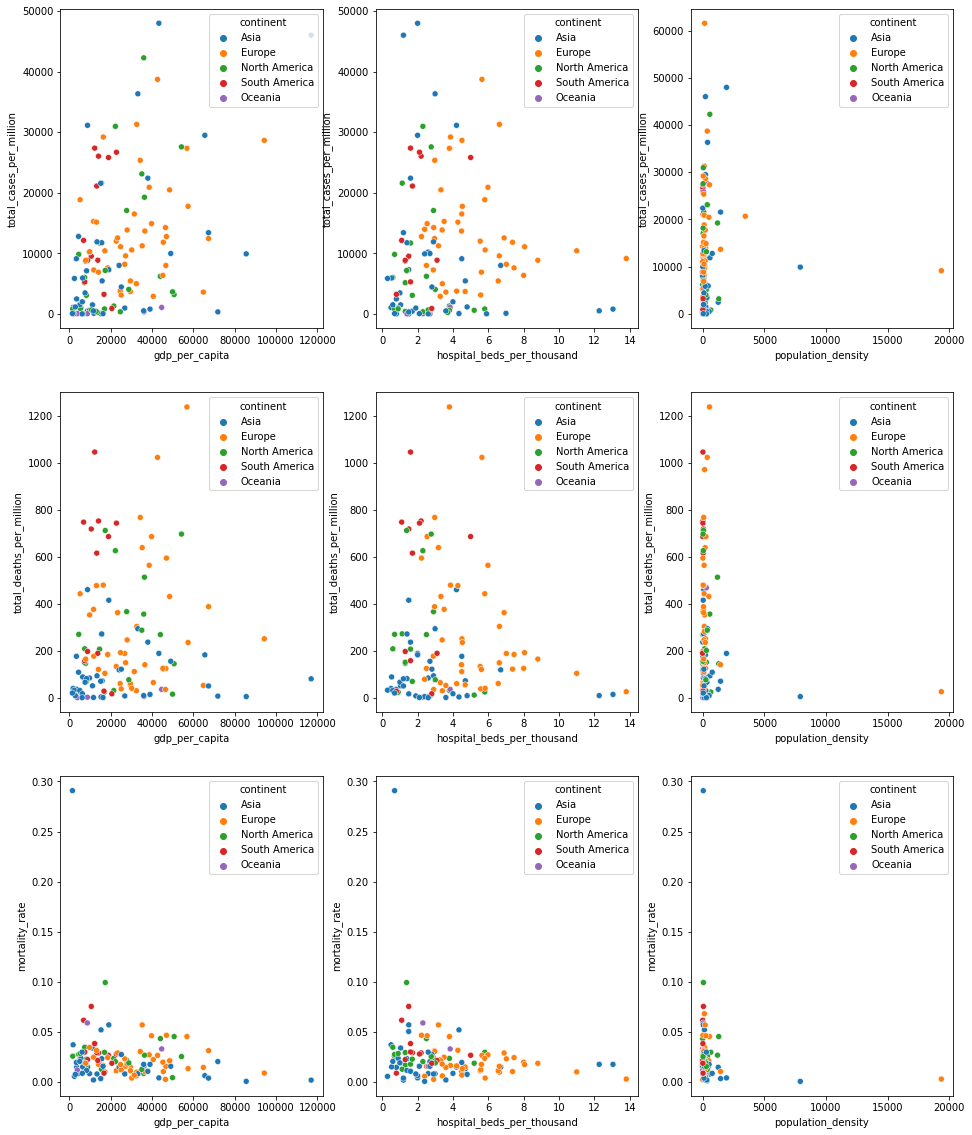

In [15]:
# Remove Africa
remove_africa = dfA.copy()
remove_africa = remove_africa.loc[remove_africa.continent!="Africa"]
my_plot(remove_africa)

Without Africa, as before, some continents seems to have clustering. Oceania had less cases and especially Australia had the maximum cases per country (1,081 cases per million). Oceacia and Asia's lockdown prohibitions work for most countries! Bahrain had the most cases around 48,145.17. 
Europe, North America and South America seems like they didn't lockdown in time, and that is why the cases are high enough, and so deaths and mortality rate. Hospital beds are getting filled rapidly and are in need for new ones.


## Pearson correlation coefficient for non Africa countries

In [16]:
# pearson correlation coefficient 
remove_africa = remove_africa[["total_cases_per_million","total_deaths_per_million","mortality_rate",
                "gdp_per_capita","hospital_beds_per_thousand","population_density"]]

remove_africa = calc_pearson_cc(remove_africa.dropna(axis=0,how="any"))


## Dataframe for Non Africa countries

In [17]:
# creating a DataFrame with pearson correlation coefficient and pvalue 
# for non Africa countries
remove_africa = pd.DataFrame(data=remove_africa,
                columns=["Indexer","Characteristic",
                "Pearson_Correlation_Coefficient","Pvalue","Statistically_Significant"])
remove_africa

,Indexer,Characteristic,Pearson_Correlation_Coefficient,Pvalue,Statistically_Significant
0,total_cases_per_million,gdp_per_capita,0.399199,0.000014,Yes
1,total_cases_per_million,hospital_beds_per_thousand,-0.007768,0.935509,No
2,total_cases_per_million,population_density,0.060111,0.530849,No
3,total_deaths_per_million,gdp_per_capita,0.074623,0.436341,No
4,total_deaths_per_million,hospital_beds_per_thousand,-0.065299,0.495930,No
5,total_deaths_per_million,population_density,-0.099733,0.297664,No
6,mortality_rate,gdp_per_capita,-0.206774,0.029449,Yes
7,mortality_rate,hospital_beds_per_thousand,-0.193445,0.041926,Yes
8,mortality_rate,population_density,-0.114687,0.230688,No


Now, without africa all the pearson correlation coefficient values have decreased. It's important to say that while before (check 'all_countries' dataframe), the coefficient for total cases and hospital beds was 0.1522, now it is -0.0077, it is negative. Same for total deaths and hospital beds. Also, total deaths and gdp per capita is not statistically significant anymore.

## Log population density of non Africa countries

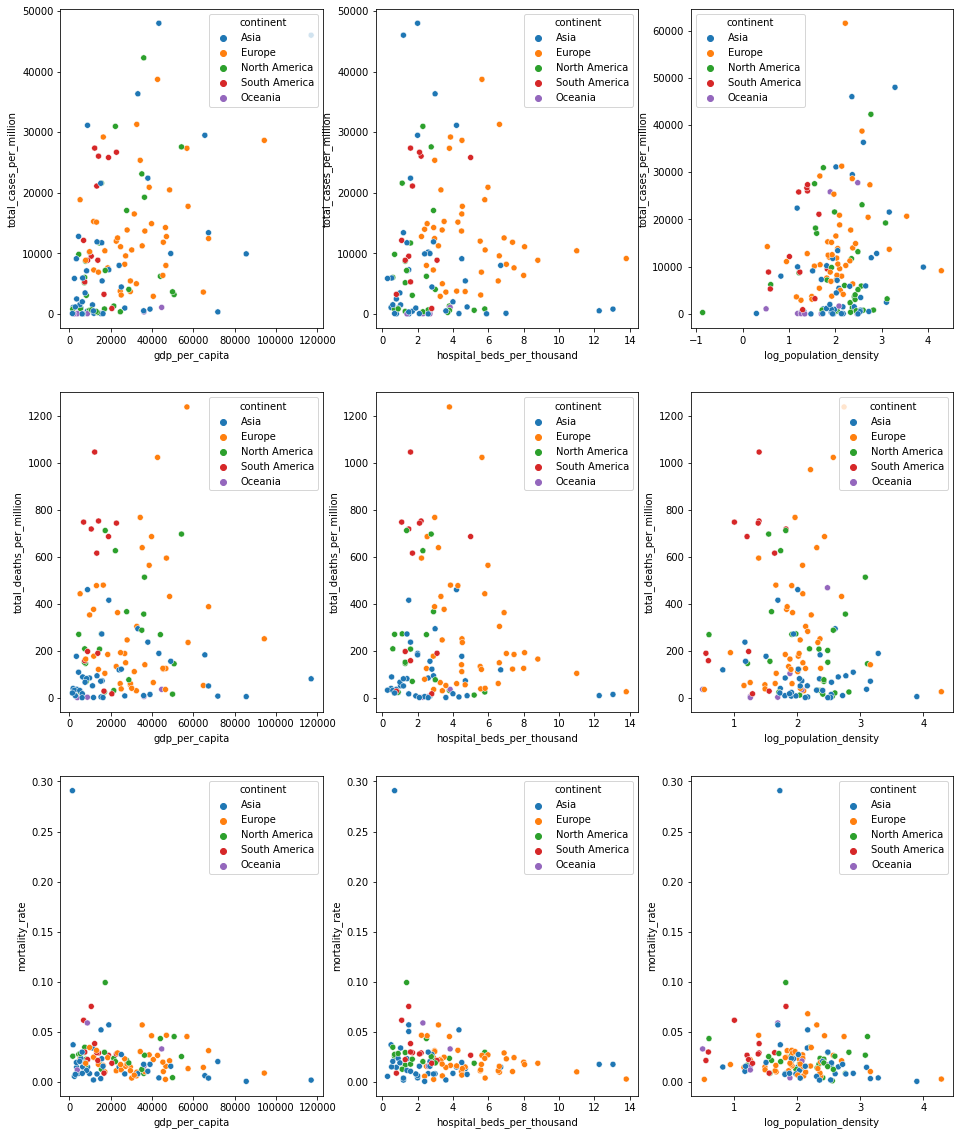

In [18]:
# Log population density for Non Africa Countries
log_remove_africa = dfA.copy()
log_remove_africa = log_remove_africa.loc[log_remove_africa.continent!="Africa"]
my_plot(log_remove_africa,"log_population_density")

About the log of populaton density now, all countries are as usual in lockdown and total cases, deaths and morality rate are high enough! Most of population density cases are 2people/km2.

## Pearson correlation coefficient for log of population density for non Africa countries

In [19]:
# pearson correlation coefficient 
log_remove_africa = log_remove_africa[["total_cases_per_million","total_deaths_per_million","mortality_rate",
                "gdp_per_capita","hospital_beds_per_thousand","log_population_density"]]

#pop_dens_remove_africa.corr(method="pearson")
log_remove_africa = calc_pearson_cc(log_remove_africa.dropna(axis=0,how="any"))

## DataFrame for non Africa countries - log population density

In [20]:
# creating a DataFrame with pearson correlation coefficient and pvalue 
# for non Africa countries with log population density
log_remove_africa = pd.DataFrame(data=log_remove_africa,
                    columns=["Indexer","Characteristic",
                "Pearson_Correlation_Coefficient","Pvalue","Statistically_Significant"])
log_remove_africa

,Indexer,Characteristic,Pearson_Correlation_Coefficient,Pvalue,Statistically_Significant
0,total_cases_per_million,gdp_per_capita,0.399199,0.000014,Yes
1,total_cases_per_million,hospital_beds_per_thousand,-0.007768,0.935509,No
2,total_cases_per_million,log_population_density,0.107548,0.261214,No
3,total_deaths_per_million,gdp_per_capita,0.074623,0.436341,No
4,total_deaths_per_million,hospital_beds_per_thousand,-0.065299,0.495930,No
5,total_deaths_per_million,log_population_density,-0.086919,0.364354,No
6,mortality_rate,gdp_per_capita,-0.206774,0.029449,Yes
7,mortality_rate,hospital_beds_per_thousand,-0.193445,0.041926,Yes
8,mortality_rate,log_population_density,-0.120763,0.206754,No


## Europe countries

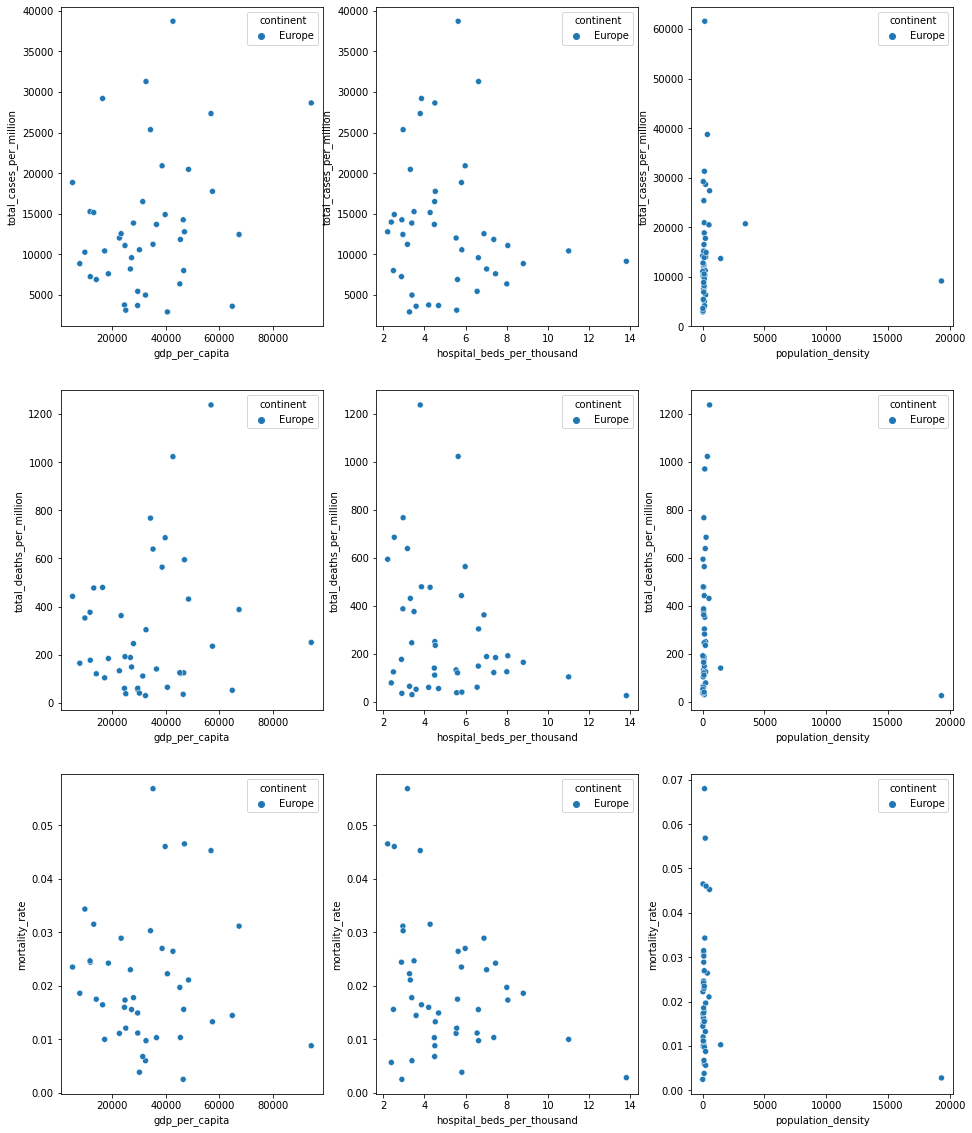

In [21]:
# Europe Countries
europe = dfA.copy()
europe = europe.loc[europe.continent=="Europe"]
my_plot(europe)

We can assume that European inhabitants enjoyed the summer(!) and they were not so serious about the circumstances. Mortality rate is high, also cases and deaths. Belgium had the most cases per million people, around 38,052.86 while Finland had 2,940.23 cases. San Marino had the most deaths at '2020-11-01' around 1,237.55 while Cyprus 29.68.

## Pearson correlation coefficient for Europe countries

In [22]:
# Pearson Correlation Coefficient
europe = europe[["total_cases_per_million","total_deaths_per_million","mortality_rate",
                "gdp_per_capita","hospital_beds_per_thousand","population_density"]]

europe = calc_pearson_cc(europe.dropna(axis=0,how="any"))

## DataFrame for Europe countries

In [23]:
# creating a DataFrame with pearson correlation coefficient and pvalue 
# for non Africa countries with log population density
europe = pd.DataFrame(data=europe,
                      columns=["Indexer","Characteristic",
                "Pearson_Correlation_Coefficient","Pvalue","Statistically_Significant"])
europe

,Indexer,Characteristic,Pearson_Correlation_Coefficient,Pvalue,Statistically_Significant
0,total_cases_per_million,gdp_per_capita,0.249768,0.115277,No
1,total_cases_per_million,hospital_beds_per_thousand,-0.103825,0.518285,No
2,total_cases_per_million,population_density,0.265031,0.094005,No
3,total_deaths_per_million,gdp_per_capita,0.161513,0.313048,No
4,total_deaths_per_million,hospital_beds_per_thousand,-0.269107,0.088871,No
5,total_deaths_per_million,population_density,0.241561,0.128124,No
6,mortality_rate,gdp_per_capita,0.029914,0.852709,No
7,mortality_rate,hospital_beds_per_thousand,-0.321293,0.040528,Yes
8,mortality_rate,population_density,0.056628,0.725090,No


## Log population density for Europe countries

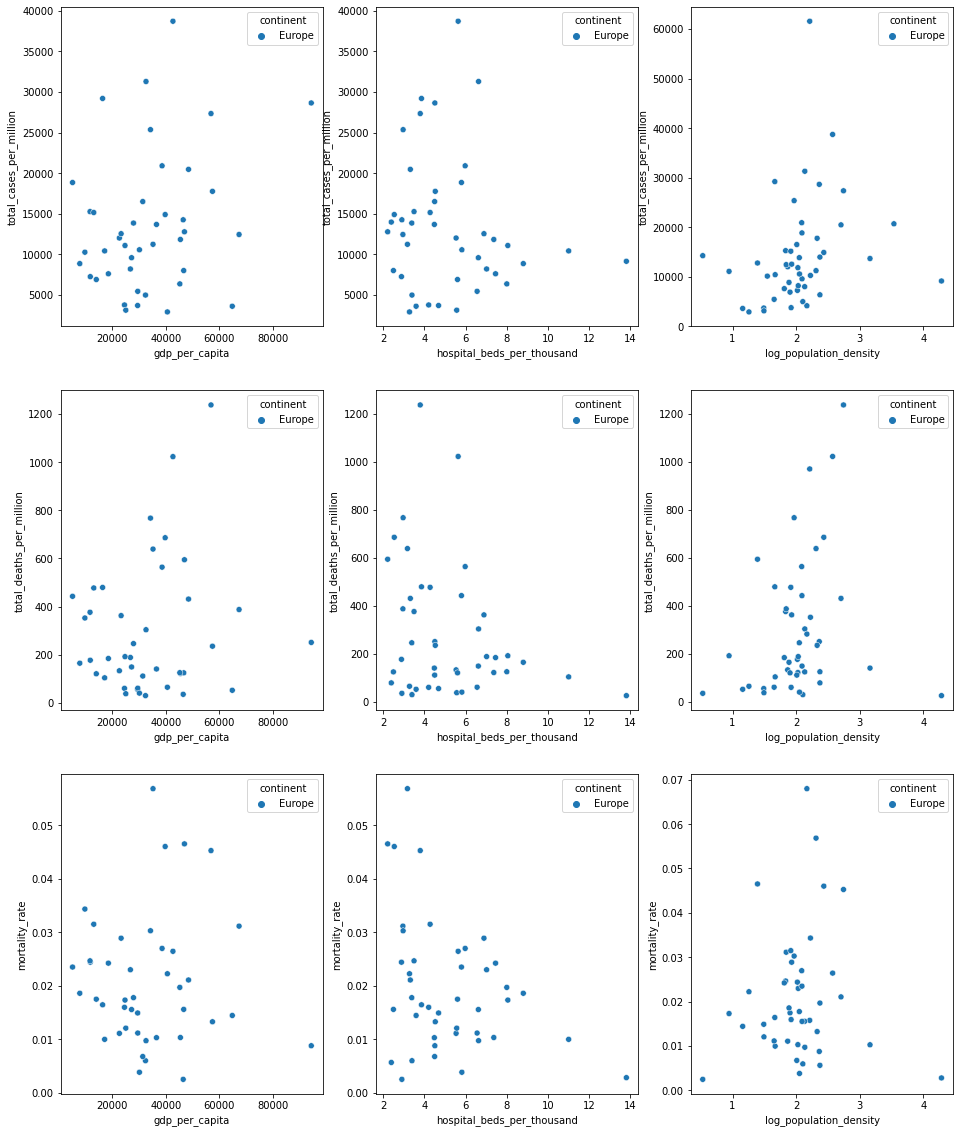

In [24]:
# Log population density for Europe Countries
log_europe = dfA.copy()
log_europe = log_europe.loc[log_europe.continent=="Europe"]
my_plot(log_europe,"log_population_density")


Same as above, Europe now is in lockdown due to wide dispersion and Monaco(bottom right) isn't. Lucky Monaco, i wish i was there haha.

## Pearson correlation coefficient for log of population density for Europe countries


In [25]:
# pearson correlation coefficient 
log_europe = log_europe[["total_cases_per_million","total_deaths_per_million","mortality_rate",
                "gdp_per_capita","hospital_beds_per_thousand","log_population_density"]]

log_europe = calc_pearson_cc(log_europe.dropna(axis=0,how="any"))

## Creating DataFrame for Europe countries - log population density


In [26]:
# creating a DataFrame with pearson correlation coefficient and pvalue 
# for non Africa countries with log population density
log_europe = pd.DataFrame(data=log_europe,
                          columns=["Indexer","Characteristic",
                "Pearson_Correlation_Coefficient","Pvalue","Statistically_Significant"])
log_europe

,Indexer,Characteristic,Pearson_Correlation_Coefficient,Pvalue,Statistically_Significant
0,total_cases_per_million,gdp_per_capita,0.249768,0.115277,No
1,total_cases_per_million,hospital_beds_per_thousand,-0.103825,0.518285,No
2,total_cases_per_million,log_population_density,0.397079,0.010153,Yes
3,total_deaths_per_million,gdp_per_capita,0.161513,0.313048,No
4,total_deaths_per_million,hospital_beds_per_thousand,-0.269107,0.088871,No
5,total_deaths_per_million,log_population_density,0.411602,0.007502,Yes
6,mortality_rate,gdp_per_capita,0.029914,0.852709,No
7,mortality_rate,hospital_beds_per_thousand,-0.321293,0.040528,Yes
8,mortality_rate,log_population_density,0.219436,0.168051,No


## Bar plots between indexes and continents

In [27]:
dfB = dfA.copy()
dfB

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,mortality_rate,log_population_density
306,AFG,Asia,Afghanistan,2020-11-01,41501.0,76.0,104.714,1536.0,0.0,3.571,...,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,0.037011,1.735774
567,ALB,Europe,Albania,2020-11-01,20875.0,241.0,288.143,509.0,7.0,5.143,...,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,0.024383,2.020655
897,DZA,Africa,Algeria,2020-11-01,57942.0,291.0,294.571,1964.0,8.0,8.143,...,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,0.033896,1.239249
1159,AND,Europe,Andorra,2020-11-01,4756.0,91.0,102.571,75.0,0.0,0.857,...,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,0.015770,2.214195
1407,AGO,Africa,Angola,2020-11-01,10558.0,289.0,247.000,279.0,4.0,2.000,...,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,0.026426,1.378216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57728,YEM,Asia,Yemen,2020-11-01,2063.0,0.0,0.000,600.0,0.0,0.143,...,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,0.290843,1.728419
57979,ZMB,Africa,Zambia,2020-11-01,16432.0,17.0,45.000,349.0,0.0,0.143,...,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,0.021239,1.361633
58228,ZWE,Africa,Zimbabwe,2020-11-01,8362.0,0.0,13.286,242.0,0.0,0.857,...,307.846,1.82,1.600,30.700,36.791,1.700,61.49,0.535,0.028940,1.630723
58558,OWID_WRL,NaN,World,2020-11-01,46181592.0,459027.0,484913.429,1196568.0,6419.0,6476.714,...,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,0.025910,1.763765


In [28]:
dfB.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

<AxesSubplot:title={'center':'Total cases per million -- Average Values per Continent'}, xlabel='total_cases_per_million', ylabel='continent'>

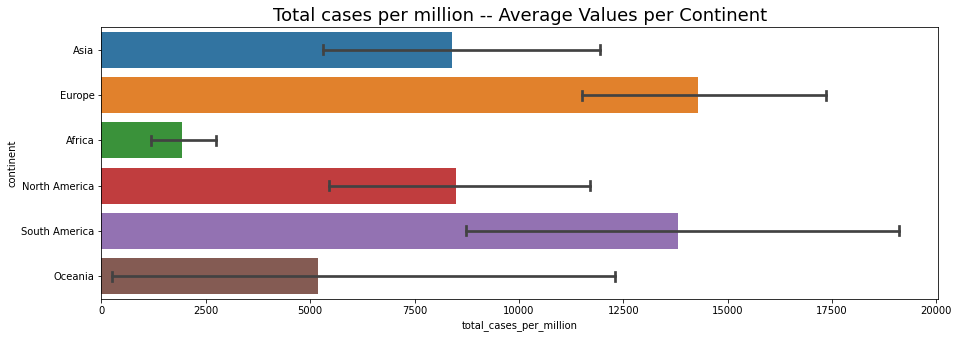

In [29]:
plt.figure(figsize=(15,5))
plt.title("Total cases per million -- Average Values per Continent",fontsize = 18)
sns.barplot(x="total_cases_per_million",y="continent",data=dfB,capsize=.2)

Europe and South America have the lead about most cases and then North America, Asia, Oceania and Africa. 
Africa has low wide dispersion unlike other continets.

<AxesSubplot:title={'center':'Total deaths per million -- Average Values per Continent'}, xlabel='total_deaths_per_million', ylabel='continent'>

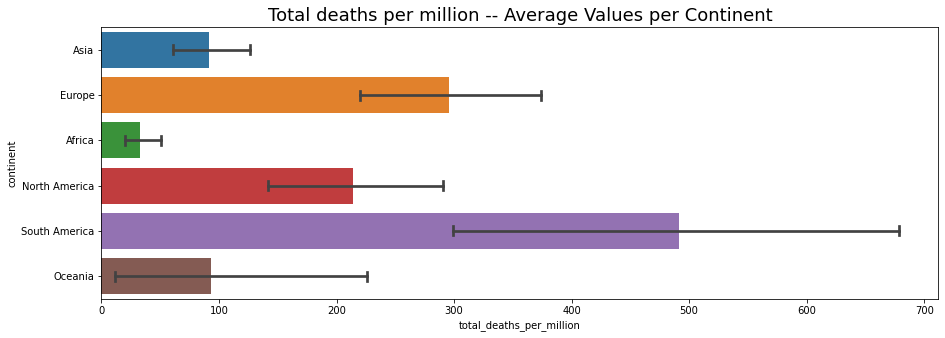

In [30]:
plt.figure(figsize=(15,5))
plt.title("Total deaths per million -- Average Values per Continent",fontsize = 18)
sns.barplot(x="total_deaths_per_million",y="continent",data=dfB,capsize=.2)

At the above plot it is ovbious that both Europe and South America have high total cases, but now we see that Europe has better health system than South America.

<AxesSubplot:title={'center':'Mortality Rate -- Average Values per Continent'}, xlabel='mortality_rate', ylabel='continent'>

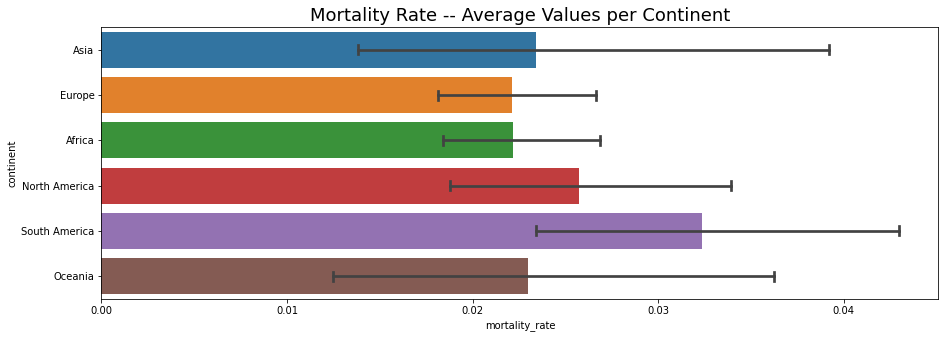

In [31]:
plt.figure(figsize=(15,5))
plt.title("Mortality Rate -- Average Values per Continent",fontsize = 18)
sns.barplot(x="mortality_rate",y="continent",data=dfB,capsize=.2)

## T-test

In [32]:
dfB = dfA.copy()
dfB

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,mortality_rate,log_population_density
306,AFG,Asia,Afghanistan,2020-11-01,41501.0,76.0,104.714,1536.0,0.0,3.571,...,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,0.037011,1.735774
567,ALB,Europe,Albania,2020-11-01,20875.0,241.0,288.143,509.0,7.0,5.143,...,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,0.024383,2.020655
897,DZA,Africa,Algeria,2020-11-01,57942.0,291.0,294.571,1964.0,8.0,8.143,...,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,0.033896,1.239249
1159,AND,Europe,Andorra,2020-11-01,4756.0,91.0,102.571,75.0,0.0,0.857,...,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,0.015770,2.214195
1407,AGO,Africa,Angola,2020-11-01,10558.0,289.0,247.000,279.0,4.0,2.000,...,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,0.026426,1.378216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57728,YEM,Asia,Yemen,2020-11-01,2063.0,0.0,0.000,600.0,0.0,0.143,...,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,0.290843,1.728419
57979,ZMB,Africa,Zambia,2020-11-01,16432.0,17.0,45.000,349.0,0.0,0.143,...,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,0.021239,1.361633
58228,ZWE,Africa,Zimbabwe,2020-11-01,8362.0,0.0,13.286,242.0,0.0,0.857,...,307.846,1.82,1.600,30.700,36.791,1.700,61.49,0.535,0.028940,1.630723
58558,OWID_WRL,NaN,World,2020-11-01,46181592.0,459027.0,484913.429,1196568.0,6419.0,6476.714,...,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,0.025910,1.763765


In [33]:
dfB_ttest_grouping = dfB[["total_cases_per_million","total_deaths_per_million","mortality_rate","continent"]].dropna(axis=0,how="any").groupby("continent")
dfB_ttest_grouping

In [34]:
def calc_ttest(grouping):
    # array to return after all the values and create 
    # a dataframe
    ttest_cases = []
    ttest_deaths = []
    ttest_mortality_rate = []
    # keep an array for continent to use to loop
    con = ["Asia","Europe","Africa","North America","South America","Oceania"]
    
    
    # looping at lenth of con array and calculate ttest by 2 continents,
    # ttest for total cases per million, it is stored at 'ttest_cases' array
    # for total deaths per million, it is stored at 'ttest_deaths' array 
    # and for mortality reate, it is stored at 'ttest_mortality_rate' array
    
    for i in range(len(con)):
        for j in range(i+1,len(con)):
            #print(con[i],con[j])
            
            
            #==============================================================================#
            # Calculating ttest for total cases per million
            cases1 = grouping.get_group(con[i]).total_cases_per_million
            cases2 = grouping.get_group(con[j]).total_cases_per_million
            
            # calculate ttest with stats.ttest_ind
            stat_cases, pval_cases = stats.ttest_ind(cases1,cases2,equal_var = False)
            
            
            # append every time the values to ttest_cases
            if pval_cases<0.05:
                ttest_cases.append([con[i],con[j],stat_cases,pval_cases,"Yes"])
            else:
                ttest_cases.append([con[i],con[j],stat_cases,pval_cases,"No"])
            #==============================================================================#
            
            
            #==============================================================================#
            # Calculating ttest for total deaths per million
            deaths1 = grouping.get_group(con[i]).total_deaths_per_million
            deaths2 = grouping.get_group(con[j]).total_deaths_per_million
            
            stat_deaths, pval_deaths = stats.ttest_ind(deaths1,deaths2,equal_var = False)
            
            # append every time the values to ttest_deaths
            if pval_deaths<0.05:
                ttest_deaths.append([con[i],con[j],stat_deaths,pval_deaths,"Yes"])
            else:
                ttest_deaths.append([con[i],con[j],stat_deaths,pval_deaths,"No"])
            #==============================================================================#
            
            
            #==============================================================================#
            # Calculating ttest for mortality rate per million
            mortality_rate1 = grouping.get_group(con[i]).mortality_rate
            mortality_rate2 = grouping.get_group(con[j]).mortality_rate
            
            stat_mortality, pval_mortality = stats.ttest_ind(mortality_rate1,mortality_rate2,equal_var = False)
            
            # append every time the values to ttest_mortality_rate
            if pval_mortality<0.05:
                ttest_mortality_rate.append([con[i],con[j],stat_mortality,pval_mortality,"Yes"])
            else:
                ttest_mortality_rate.append([con[i],con[j],stat_mortality,pval_mortality,"No"])
            #==============================================================================#
            
      
    # returns the arrays for each indexer and we create the DataFrame
    return ttest_cases,ttest_deaths,ttest_mortality_rate



# Calling the calc_ttest with given for input the grouped dataframe
# return arrays and then we create the dataframes we want

cases_dataframe, deaths_dataframe, mortality_rate_dataframe = calc_ttest(dfB_ttest_grouping)


## DataFrame for T-test for total cases per million

In [35]:
cases_dataframe = pd.DataFrame(data=cases_dataframe,
                columns=["Continent1","Continent2",
                "Statistic","Pvalue","Statistically_Significant"])
cases_dataframe

,Continent1,Continent2,Statistic,Pvalue,Statistically_Significant
0,Asia,Europe,-1.790545,7.716901e-02,No
1,Asia,Africa,3.731353,5.444598e-04,Yes
2,Asia,North America,-0.375820,7.082588e-01,No
3,Asia,South America,-1.500233,1.477854e-01,No
4,Asia,Oceania,0.248313,8.100894e-01,No
5,Europe,Africa,7.396420,9.300083e-10,Yes
6,Europe,North America,1.372621,1.749598e-01,No
7,Europe,South America,-0.236273,8.159064e-01,No
8,Europe,Oceania,1.133593,2.928590e-01,No
9,Africa,North America,-4.242720,1.882724e-04,Yes


## DataFrame for T-test for total deaths per million

In [36]:
deaths_dataframe = pd.DataFrame(data=deaths_dataframe,
                columns=["Continent1","Continent2",
                "Statistic","Pvalue","Statistically_Significant"])
deaths_dataframe

,Continent1,Continent2,Statistic,Pvalue,Statistically_Significant
0,Asia,Europe,-4.661187,1.670452e-05,Yes
1,Asia,Africa,3.092507,3.111276e-03,Yes
2,Asia,North America,-2.952039,5.284275e-03,Yes
3,Asia,South America,-3.918190,2.156251e-03,Yes
4,Asia,Oceania,-0.025907,9.800651e-01,No
5,Europe,Africa,6.398936,5.120530e-08,Yes
6,Europe,North America,1.476284,1.442150e-01,No
7,Europe,South America,-1.804422,9.164984e-02,No
8,Europe,Oceania,2.681121,2.065913e-02,Yes
9,Africa,North America,-4.686948,5.541892e-05,Yes


## DataFrame for T-test for mortality rate

In [37]:
mortality_rate_dataframe = pd.DataFrame(data=mortality_rate_dataframe,
                columns=["Continent1","Continent2",
                "Statistic","Pvalue","Statistically_Significant"])
mortality_rate_dataframe

,Continent1,Continent2,Statistic,Pvalue,Statistically_Significant
0,Asia,Europe,0.172581,0.863710,No
1,Asia,Africa,0.167365,0.867797,No
2,Asia,North America,-0.295828,0.768396,No
3,Asia,South America,-1.014012,0.316026,No
4,Asia,Oceania,0.042996,0.966099,No
5,Europe,Africa,-0.013964,0.988887,No
6,Europe,North America,-0.833137,0.408983,No
7,Europe,South America,-1.764298,0.098214,No
8,Europe,Oceania,-0.117826,0.909391,No
9,Africa,North America,-0.831265,0.410128,No


## Breaking data into months, starting from January 2020, for each day calculate the total number of new cases, total number of new deaths, and (total number of new cases/total number of new deaths)

In [38]:
# creating a copy of the original dataframe
dfC = df.copy()

dfC = dfC[["date","new_cases","new_deaths"]]
dfC

,date,new_cases,new_deaths
0,2019-12-31,0.0,0.0
1,2020-01-01,0.0,0.0
2,2020-01-02,0.0,0.0
3,2020-01-03,0.0,0.0
4,2020-01-04,0.0,0.0
...,...,...,...
58907,2020-11-20,NaN,NaN
58908,2020-11-21,NaN,NaN
58909,2020-11-22,NaN,NaN
58910,2020-11-23,NaN,NaN


In [39]:
# convert date to datetime to work with
dfC["date"] = pd.to_datetime(dfC["date"])
dfC

,date,new_cases,new_deaths
0,2019-12-31,0.0,0.0
1,2020-01-01,0.0,0.0
2,2020-01-02,0.0,0.0
3,2020-01-03,0.0,0.0
4,2020-01-04,0.0,0.0
...,...,...,...
58907,2020-11-20,NaN,NaN
58908,2020-11-21,NaN,NaN
58909,2020-11-22,NaN,NaN
58910,2020-11-23,NaN,NaN


## Grouping by days

In [40]:
# grouping everything by days
days_grouping = dfC.dropna(axis=0,how="any").groupby(["date"])
days_grouping

## DataFrame for daily cases and deaths for all continents

In [41]:
# keeping an array to store the values
covid_daily = []
for day_date,day_column in days_grouping:
    #print("Date: {} \n-- total New cases per million\t{}\n-- total New deaths per million\t{}\n-- total New mortality rate per million\t{}\n"
    #      .format(day_date,
    #              # for each day, sum of new cases per million
    #              day_column.new_cases_per_million.sum(),
    #              # for each daty, sum of new deathes per million
    #             day_column.new_deaths_per_million.sum(),
    #              # for each day sum of new mortality rate per million
    #             day_column.new_mortality_rate_per_million.sum()))
    
    # find the daily cases 
    daily_cases = day_column.new_cases.sum()
    
    # find the daily deaths
    daily_deaths = day_column.new_deaths.sum()
    
    daily_mortality_rate = daily_deaths/(daily_cases)
    
    covid_daily.append([day_date,daily_cases,daily_deaths,daily_mortality_rate])
    
covid_daily = pd.DataFrame(data=covid_daily,
                          columns=["Date","Total_New_Cases",
                "Total_New_Deaths","Mortality_Rate"])

covid_daily

<ipython-input-41-59526bb8a73f>:19: RuntimeWarning: invalid value encountered in double_scalars
  daily_mortality_rate = daily_deaths/(daily_cases)
<ipython-input-41-59526bb8a73f>:19: RuntimeWarning: divide by zero encountered in double_scalars
  daily_mortality_rate = daily_deaths/(daily_cases)


,Date,Total_New_Cases,Total_New_Deaths,Mortality_Rate
0,2019-12-31,54.0,0.0,0.000000
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,34.0,0.0,0.000000
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
325,2020-11-20,1276460.0,21360.0,0.016734
326,2020-11-21,1360458.0,23910.0,0.017575
327,2020-11-22,1134488.0,16784.0,0.014794
328,2020-11-23,1031827.0,13943.0,0.013513


In [42]:
# setting the months so we can plot
def get_month(row):
    return row.Date.month

covid_daily['Month'] = covid_daily.apply(get_month,axis = 1)
covid_daily

,Date,Total_New_Cases,Total_New_Deaths,Mortality_Rate,Month
0,2019-12-31,54.0,0.0,0.000000,12
1,2020-01-01,0.0,0.0,NaN,1
2,2020-01-02,0.0,0.0,NaN,1
3,2020-01-03,34.0,0.0,0.000000,1
4,2020-01-04,0.0,0.0,NaN,1
...,...,...,...,...,...
325,2020-11-20,1276460.0,21360.0,0.016734,11
326,2020-11-21,1360458.0,23910.0,0.017575,11
327,2020-11-22,1134488.0,16784.0,0.014794,11
328,2020-11-23,1031827.0,13943.0,0.013513,11


In [43]:
# dropping the date '2019-12-31'
# statring from January
covid_daily = covid_daily.drop([0])

In [44]:
covid_daily

,Date,Total_New_Cases,Total_New_Deaths,Mortality_Rate,Month
1,2020-01-01,0.0,0.0,NaN,1
2,2020-01-02,0.0,0.0,NaN,1
3,2020-01-03,34.0,0.0,0.000000,1
4,2020-01-04,0.0,0.0,NaN,1
5,2020-01-05,30.0,0.0,0.000000,1
...,...,...,...,...,...
325,2020-11-20,1276460.0,21360.0,0.016734,11
326,2020-11-21,1360458.0,23910.0,0.017575,11
327,2020-11-22,1134488.0,16784.0,0.014794,11
328,2020-11-23,1031827.0,13943.0,0.013513,11


<AxesSubplot:xlabel='Month', ylabel='Total_New_Cases'>

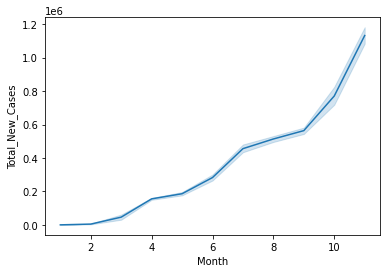

In [45]:
# lineplots for New cases per million
sns.lineplot(x="Month",y="Total_New_Cases",data=covid_daily,estimator="mean")

As we know, at January 9 2020, WHO announces mysterious coronavirus-related pneumonia in Wuhan, China and at January 21, CDC confirms first US coronavirus case. After that day, the world isn't the same anymore. Covid virus is spreading rapidly and every country is getting lockdowned. As the months passed, total new cases are getting high and high and have been disoriented everything. Until today, December 2 2020, the vaccine has not been found yet.

<AxesSubplot:xlabel='Month', ylabel='Total_New_Deaths'>

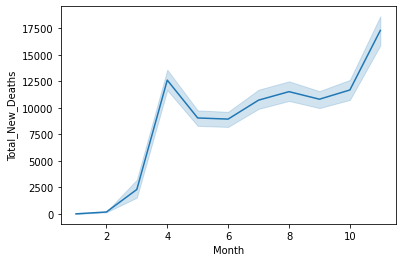

In [46]:
# lineplots for New deaths per million
sns.lineplot(x="Month",y= "Total_New_Deaths",data=covid_daily,estimator="mean")

As total new cases are increasing so does and total new deaths. Covid started so abruptly, so the health system of each country was not prepared for something like that. From March to April, total new deaths jumped from 2500 to 12500(!!), like x10. Also after April, deaths were not so many, because warm weather makes the virus weakens, so while the cases are increasing, deaths are decreasing in some way. And in October are increasing again..

/home/ze/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='Month', ylabel='Mortality_Rate'>

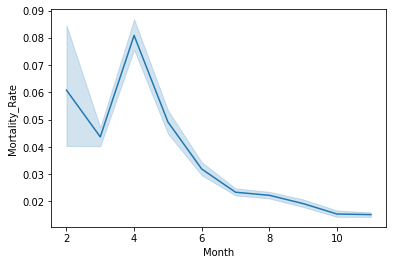

In [47]:
# lineplots for each continent per month for new mortality rate
sns.lineplot(x="Month",y="Mortality_Rate",data=covid_daily,estimator="mean")

## Grouping by Dates and Continents

In [48]:
covid_daily_continents = df.copy()
covid_daily_continents = covid_daily_continents[["date","new_cases","new_deaths","continent"]]
covid_daily_continents

,date,new_cases,new_deaths,continent
0,2019-12-31,0.0,0.0,Asia
1,2020-01-01,0.0,0.0,Asia
2,2020-01-02,0.0,0.0,Asia
3,2020-01-03,0.0,0.0,Asia
4,2020-01-04,0.0,0.0,Asia
...,...,...,...,...
58907,2020-11-20,NaN,NaN,NaN
58908,2020-11-21,NaN,NaN,NaN
58909,2020-11-22,NaN,NaN,NaN
58910,2020-11-23,NaN,NaN,NaN


In [49]:
# grouping by date and continent
covid_daily_continents_grouping = covid_daily_continents.dropna(axis=0,how="any").groupby(["date","continent"])
covid_daily_continents_grouping

## DataFrame for Date and Continent

In [50]:
# keeping an array to store the values
covid_daily_continents = []

# keeping an array to store the values and create a dataframe
# print for each day time and continent the results
for day_date,day_column in covid_daily_continents_grouping:
    #print(day_date[0],day_date[1])
    #print("Date: {} \t\t\tContinent: {}\n-- total New cases per million\t{}\n-- total New deaths per million\t{}\n-- total New mortality rate per million\t{}\n"
    #      .format(day_date[0],day_date[1],
    #              # for each day and continent, sum of new cases per million
    #              day_column.new_cases_per_million.sum(),
    #              # for each day and continent, sum of new deathes per million
    #             day_column.new_deaths_per_million.sum(),
    #              # for each day and continent, sum of new mortality rate per million
    #             day_column.new_mortality_rate_per_million.sum()))
    
    # continent
    #daily_con = day_column.continent
    
    # find the daily cases per continent
    daily_con_cases = day_column.new_cases.sum()
    
    # find the daily deaths per continent
    daily_con_deaths = day_column.new_deaths.sum()
    
    # mortality rate
    daily_con_mortality_rate = daily_con_deaths/(daily_con_cases)
    
    covid_daily_continents.append([day_date[0],day_date[1],daily_con_cases,daily_con_deaths,daily_con_mortality_rate])

    
# Creating the DataFrame
covid_daily_continents = pd.DataFrame(data=covid_daily_continents,
                          columns=["Date","Continent","Total_New_Cases",
                "Total_New_Deaths","Mortality_Rate"])
covid_daily_continents

<ipython-input-50-0211f0d809cc>:27: RuntimeWarning: invalid value encountered in double_scalars
  daily_con_mortality_rate = daily_con_deaths/(daily_con_cases)
<ipython-input-50-0211f0d809cc>:27: RuntimeWarning: divide by zero encountered in double_scalars
  daily_con_mortality_rate = daily_con_deaths/(daily_con_cases)


,Date,Continent,Total_New_Cases,Total_New_Deaths,Mortality_Rate
0,2019-12-31,Africa,0.0,0.0,NaN
1,2019-12-31,Asia,27.0,0.0,0.000000
2,2019-12-31,Europe,0.0,0.0,NaN
3,2019-12-31,North America,0.0,0.0,NaN
4,2019-12-31,Oceania,0.0,0.0,NaN
...,...,...,...,...,...
1975,2020-11-24,Asia,98612.0,1746.0,0.017706
1976,2020-11-24,Europe,176066.0,4225.0,0.023997
1977,2020-11-24,North America,194937.0,1328.0,0.006812
1978,2020-11-24,Oceania,68.0,0.0,0.000000


In [51]:
covid_daily_continents.head(10)

,Date,Continent,Total_New_Cases,Total_New_Deaths,Mortality_Rate
0,2019-12-31,Africa,0.0,0.0,NaN
1,2019-12-31,Asia,27.0,0.0,0.0
2,2019-12-31,Europe,0.0,0.0,NaN
3,2019-12-31,North America,0.0,0.0,NaN
4,2019-12-31,Oceania,0.0,0.0,NaN
5,2019-12-31,South America,0.0,0.0,NaN
6,2020-01-01,Africa,0.0,0.0,NaN
7,2020-01-01,Asia,0.0,0.0,NaN
8,2020-01-01,Europe,0.0,0.0,NaN
9,2020-01-01,North America,0.0,0.0,NaN


In [52]:
# setting the months so we can plot
covid_daily_continents['Month'] = pd.DatetimeIndex(covid_daily_continents["Date"]).month
covid_daily_continents

,Date,Continent,Total_New_Cases,Total_New_Deaths,Mortality_Rate,Month
0,2019-12-31,Africa,0.0,0.0,NaN,12
1,2019-12-31,Asia,27.0,0.0,0.000000,12
2,2019-12-31,Europe,0.0,0.0,NaN,12
3,2019-12-31,North America,0.0,0.0,NaN,12
4,2019-12-31,Oceania,0.0,0.0,NaN,12
...,...,...,...,...,...,...
1975,2020-11-24,Asia,98612.0,1746.0,0.017706,11
1976,2020-11-24,Europe,176066.0,4225.0,0.023997,11
1977,2020-11-24,North America,194937.0,1328.0,0.006812,11
1978,2020-11-24,Oceania,68.0,0.0,0.000000,11


In [53]:
# date must start from January 2020
covid_daily_continents.head(10)

,Date,Continent,Total_New_Cases,Total_New_Deaths,Mortality_Rate,Month
0,2019-12-31,Africa,0.0,0.0,NaN,12
1,2019-12-31,Asia,27.0,0.0,0.0,12
2,2019-12-31,Europe,0.0,0.0,NaN,12
3,2019-12-31,North America,0.0,0.0,NaN,12
4,2019-12-31,Oceania,0.0,0.0,NaN,12
5,2019-12-31,South America,0.0,0.0,NaN,12
6,2020-01-01,Africa,0.0,0.0,NaN,1
7,2020-01-01,Asia,0.0,0.0,NaN,1
8,2020-01-01,Europe,0.0,0.0,NaN,1
9,2020-01-01,North America,0.0,0.0,NaN,1


In [54]:
# dropping the dates of '2019'
# statring from January
covid_daily_continents = covid_daily_continents.drop([0,1,2,3,4,5])
covid_daily_continents

,Date,Continent,Total_New_Cases,Total_New_Deaths,Mortality_Rate,Month
6,2020-01-01,Africa,0.0,0.0,NaN,1
7,2020-01-01,Asia,0.0,0.0,NaN,1
8,2020-01-01,Europe,0.0,0.0,NaN,1
9,2020-01-01,North America,0.0,0.0,NaN,1
10,2020-01-01,Oceania,0.0,0.0,NaN,1
...,...,...,...,...,...,...
1975,2020-11-24,Asia,98612.0,1746.0,0.017706,11
1976,2020-11-24,Europe,176066.0,4225.0,0.023997,11
1977,2020-11-24,North America,194937.0,1328.0,0.006812,11
1978,2020-11-24,Oceania,68.0,0.0,0.000000,11


<AxesSubplot:xlabel='Month', ylabel='Total_New_Cases'>

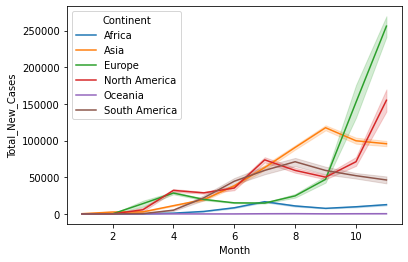

In [55]:
# lineplots for each continent per month for new cases per million
sns.lineplot(x="Month",y="Total_New_Cases",data=covid_daily_continents,hue="Continent",estimator="mean")

Above we see that on all 3 continents are gradually increasing but around September Europe cases are rapidly icreasing and so on for North America around October.

<AxesSubplot:xlabel='Month', ylabel='Total_New_Deaths'>

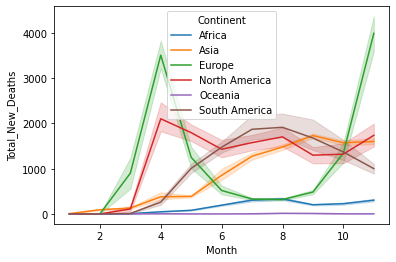

In [56]:
# lineplots for each continent per month for new deaths per million
sns.lineplot(x="Month",y="Total_New_Deaths",data=covid_daily_continents,hue="Continent",estimator="mean")

/home/ze/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/ze/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='Month', ylabel='Mortality_Rate'>

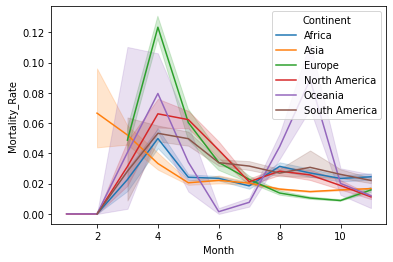

In [57]:
# lineplots for each continent per month for new mortality rate
sns.lineplot(x="Month",y="Mortality_Rate",data=covid_daily_continents,hue="Continent",estimator="mean")